<a href="https://colab.research.google.com/github/stanlet2000/DG-method-python-code/blob/main/DG_method_HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
import numpy as np
import numpy.polynomial.polynomial as poly
import numpy.polynomial.legendre as legendre
from scipy.integrate import fixed_quad

In [25]:
# parameter
interval = [0., 2.]
N = 16
h = (interval[1] - interval[0]) / N
k = 5
t = [n*h for n in range(N+1)]
# f = poly.Polynomial([1, 1, 1, 1, 1])
f = np.exp

# Construct basis function

## legendre polynomial


In [26]:
P = []
for i in range(k):
  P.append(legendre.Legendre.basis(i).convert(kind=poly.Polynomial))
print(P)

[Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([0., 1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-0.5,  0. ,  1.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0. , -1.5,  0. ,  2.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.375,  0.   , -3.75 ,  0.   ,  4.375], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]


In [27]:
print(P[2])

-0.5 + 0.0·x + 1.5·x²


## $$\phi^n_j$$

In [28]:
phi = []
for n in range(N):
  phi.append([])
  s = poly.Polynomial([-t[n+1]-t[n], 2])/h

  for j in range(k):
    phi[n].append(P[j](s))

print(phi)

[[Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-1., 16.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([  1., -48., 384.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-1.000e+00,  9.600e+01, -1.920e+03,  1.024e+04], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 1.0000e+00, -1.6000e+02,  5.7600e+03, -7.1680e+04,  2.8672e+05], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')], [Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-3., 16.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([  13., -144.,  384.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([  -63.,  1056., -5760., 10240.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([    321.,   -7200.,   59520., -215040.,  286720.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')], [Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-5., 16.], d

In [29]:
print(fixed_quad(phi[0][2]*phi[0][2], t[0], t[1], n=3))
print(fixed_quad(P[0]*P[2], -1, 1))

(0.02500000000000001, None)
(-3.885780586188048e-16, None)


# Find $f_h$

## $$c^n_j$$

In [30]:
c = []
for n in range(N):
  c.append([])
  for j in range(k):
    func_to_integrate = lambda x: f(x)*phi[n][j](x)
    c[n].append(fixed_quad(func_to_integrate, t[n], t[n+1], n=5)[0] * (2*j+1)/h)
print(c)

[[1.0651876245346104, 0.06655689594252563, 0.0013864472709768788, 1.732951640781577e-05, 1.547166283213941e-07], [1.2070157089673212, 0.07541884367820276, 0.0015710505803673974, 1.963691477119278e-05, 1.7531722155267326e-07], [1.3677279834436789, 0.08546074604604367, 0.0017802335348240939, 2.2251539453149727e-05, 1.9865664382251458e-07], [1.5498388486554144, 0.09683971218001133, 0.0020172688760844437, 2.5214297578943223e-05, 2.2508869455817315e-07], [1.756197493856754, 0.10973377005221643, 0.0022858651063974167, 2.8571542974517583e-05, 2.550637567405589e-07], [1.990032473443618, 0.12434465178385976, 0.0025902245092160325, 3.2375799630071644e-05, 2.891983965427891e-07], [2.2550022188353855, 0.14090094981601398, 0.0029351088957142724, 3.668659013109088e-05, 3.2748548985106485e-07], [2.5552522759355782, 0.15966169331966262, 0.0033259141047158047, 4.1571352209168744e-05, 3.714207842536732e-07], [2.895480163671888, 0.18092040079920718, 0.0037687544227918424, 4.710650954112272e-05, 4.2179981

## compute $f_h$

In [31]:
funclist = [0]
for n in range(N):
  funclist.append(0)
  for j in range(k):
    funclist[n+1] += phi[n][j]*c[n][j]
funclist.append(0)
print(funclist)

[0, Polynomial([1.        , 0.99999974, 0.50001425, 0.16636416, 0.04436035], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00000199, 0.99994451, 0.50060967, 0.16338179, 0.05026695], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00003083, 0.99950268, 0.5031785 , 0.15665722, 0.05695883], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00018812, 0.99785954, 0.50965221, 0.1452539 , 0.06453743], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00074139, 0.99348813, 0.52264738, 0.12802587, 0.07313188], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00226897, 0.98379876, 0.54574469, 0.10350104, 0.08291896], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.00580004, 0.96508572, 0.58298886, 0.0705066 , 0.09389664], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([1.01328765, 0.93103365, 0.64112773, 0.02633902, 0.10649377], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Poly

In [32]:
def fh(x):
  condlist = [x < t[0]]
  for n in range(N):
    if n == N-1:
      condlist.append((x>=t[n]) & (x<=t[n+1]))
    else:
      condlist.append((x>=t[n]) & (x<t[n+1]))
  condlist.append(x > t[N])
  return np.piecewise(x, condlist, funclist)

In [33]:
fh(np.linspace(0, 2, 100))-f(np.linspace(0, 2, 100))

array([ 1.06328213e-09, -3.47017970e-10,  3.42250006e-10,  6.07616180e-11,
       -3.73185038e-10,  2.07806883e-10, -2.91526137e-10, -4.94041474e-10,
        3.04165804e-10,  1.99497086e-10, -4.04171141e-10,  5.11883869e-11,
        2.00567785e-10, -5.48991297e-10,  1.98233874e-10,  3.49223095e-10,
       -3.86259247e-10, -1.39056100e-10,  5.16794385e-10, -3.93224564e-10,
        1.94346761e-11,  4.90492091e-10, -3.14932969e-10, -3.40112383e-10,
        6.67593092e-10,  1.60190083e-10, -2.42407650e-10,  6.08419093e-10,
       -1.73521419e-10, -5.34938982e-10,  6.51700027e-10,  1.54647495e-09,
       -6.31411146e-10,  6.68857414e-10,  9.40625355e-11, -6.81941170e-10,
        4.20716795e-10, -8.68257466e-10, -8.57586446e-10,  6.37278674e-10,
        2.76999756e-10, -7.85731036e-10,  2.28896901e-10,  1.01008979e-10,
       -1.14693632e-09,  4.13242773e-10,  6.69822420e-10, -7.09031944e-10,
       -2.30792718e-10,  8.11792855e-10, -1.05640741e-09, -2.24924968e-10,
        1.17474119e-09, -

# L2 error

In [34]:
L2 = fixed_quad(lambda x: (f(x)-fh(x))**2, interval[0], interval[1], n=5)[0]
L2 = np.sqrt(L2)
print(L2)

3.4637873801114456e-09


# Plot

In [35]:
import matplotlib.pyplot as plt

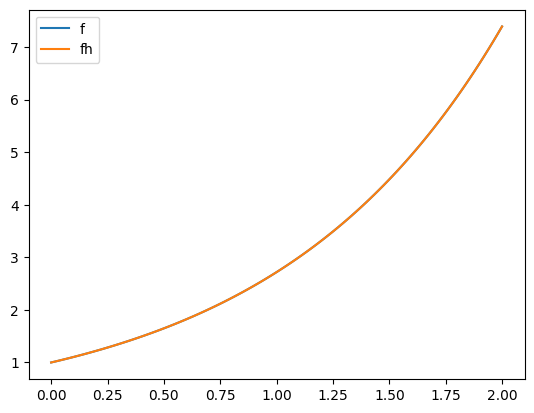

In [36]:
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), label='f')
plt.plot(np.linspace(0, 2, 100), fh(np.linspace(0, 2, 100)), label='fh')
plt.legend()
plt.show()

In [ ]:
import torch

In [ ]:
f = np.polynomial.polynomial.Polynomial([1, 1, 1, 1, 1])
print(f*np.array([2.0]))

2.0 + 2.0·x + 2.0·x² + 2.0·x³ + 2.0·x⁴


In [ ]:
print(np.array([2.0])*f)

2.0 + 2.0·x + 2.0·x² + 2.0·x³ + 2.0·x⁴


In [ ]:
type(f)

numpy.poly1d

In [ ]:
g = np.poly1d([1,1])
f(g)

poly1d([ 1,  5, 10, 10,  5])

In [ ]:
print(f.__rmul__())

TypeError: poly1d.__rmul__() missing 1 required positional argument: 'other'